In [64]:
import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk

In [3]:
updates_per_project = dict()
with open("updates_per_project.csv",'r') as file:
    # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        updates_per_project[r[0]] = int(r[-1])
#         num_updates = r[-1]
#         if updates_per_project.get(num_updates) is None:
#             updates_per_project[num_updates] = 1
#         else:
#             updates_per_project[num_updates] += 1



In [160]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
                 <class 'numpy.ndarray'>
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [168]:
count = np.zeros(max(updates_per_project.values())+1)

for k in updates_per_project:
    count[updates_per_project[k]] = count[updates_per_project[k]] + 1
    
for i in reversed(range(len(count)-1)):
    count[i] = count[i] + count[i+1]

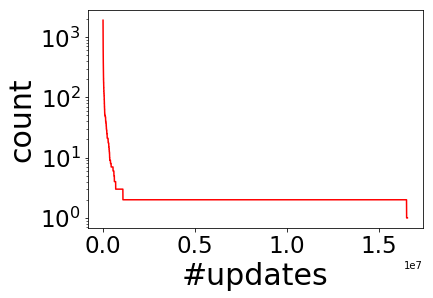

In [169]:
#plt.bar(list(updates_per_project.keys()), updates_per_project.values(), color='g')
#plt.show()

def plot_updates_per_project(count, output_file_name):
    plt.clf()
    
    ax = plt.subplot(111)
    ax.semilogy(range(len(count)), count, color="red", markersize=15)
    ax.set_ylabel('count', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0, len(count)+1, 5000000))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_per_project(count, "plot_updates_per_proect.svg")

In [4]:
# Color Entropy
# This is a discrete distribution but should probably be continuous (?)
entropy = []

with open("color_per_picture_entropy.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        if r[1] != 'NA':
            entropy.append(float(r[1]))


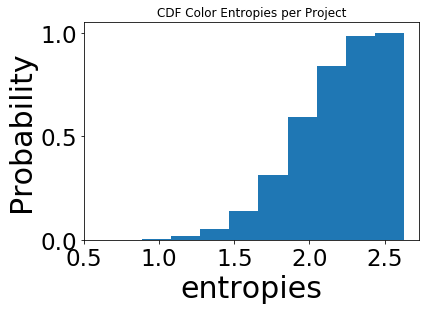

In [176]:
%matplotlib inline
def plot_color_entropies_per_project(entropy, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.hist(entropy, density=True
            , cumulative=True)
    ax.set_title('CDF Color Entropies per Project')
    ax.set_ylabel('Probability', fontsize=30)
    ax.set_xlabel('entropies', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0.5, 3, 0.5))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_color_entropies_per_project(entropy, "plot_color_entropies.svg")

In [ ]:
# ID of picture that has no points: 1240

In [124]:
# Pixels per Project
pixels = list()

with open("pixels_per_project.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        pixels.append(int(r[1]))


<class 'list'>


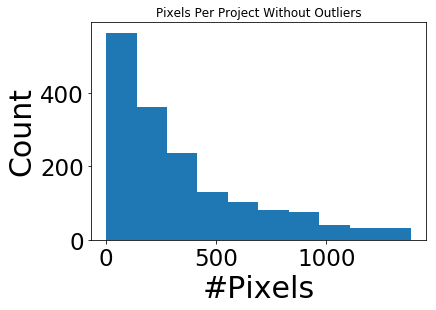

In [177]:
%matplotlib tk

def plot_x_per_project(count, output_file_name, x_axis, title):
    plt.clf()
    
    ax = plt.subplot(111)
    ax.hist(count)
    ax.set_ylabel('Count', fontsize=30)
    ax.set_xlabel(x_axis, fontsize=30)
    ax.set_title(title)
    ax.tick_params(labelsize=23)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')


# There is a lot of projects with under 20,000 pixels and then only a few with 1 million pixels.
# The huge disparity explains the big gap in the plot
plot_x_per_project(pixels, "plot_pixels_per_project.svg", "#Pixels", "Pixels Per Project")

pixels = np.array(pixels)
filtered = pixels[~is_outlier(pixels)]
plot_x_per_project(filtered, "plot_pixels_per_project_remove_outliers.svg", "#Pixels", "Pixels Per Project Without Outliers")


In [161]:
# Pixels per Project
projects_per_user = list()

with open("pixels_per_project.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        projects_per_user.append(int(r[-1]))


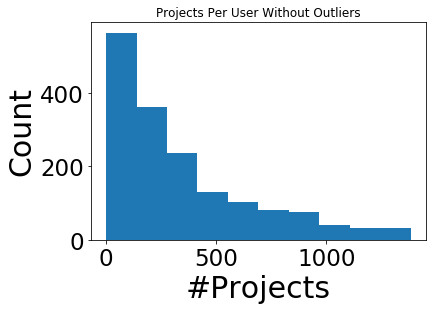

In [179]:
plot_x_per_project(pixels, "plot_projects_per_user.svg", "#Projects", "Projects Per User")

projects_per_user = np.array(projects_per_user)
filtered = projects_per_user[~is_outlier(projects_per_user)]
plot_x_per_project(filtered, "plot_projects_per_user_remove_outliers.svg", "#Projects", "Projects Per User Without Outliers")


In [170]:
# Users per Project
users_per_project = list()

with open("pixels_per_project.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        users_per_project.append(int(r[1]))


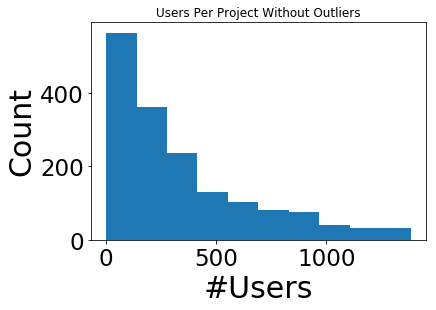

In [180]:
plot_x_per_project(pixels, "plot_users_per_project.svg", "#Users", "Users Per Project")

projects_per_user = np.array(projects_per_user)
filtered = projects_per_user[~is_outlier(projects_per_user)]
plot_x_per_project(filtered, "plot_users_per_project_remove_outliers.svg", "#Users", "Users Per Project Without Outliers")


In [183]:
# Time
entropy = list()

with open("times_per_project.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        if r[3] != 'NA':
            entropy.append(float(r[3]))


TypeError: object of type '_csv.reader' has no len()